<a href="https://colab.research.google.com/github/robertramos89/Dream-Home-Loan-Approval/blob/main/Project2_RR_LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 1
- Robert Ramos
- 03/13/2022

In [1]:
# Mount Data
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,  OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import set_config
set_config(display='diagram')

## Dataset - 2: Loan Approval Prediction


1.   Source of Data- https://www.kaggle.com/datasets/sonalisingh1411/loan-approval-prediction
2.   Brief description of Data- The dataset is from a financial instituition that wants to be able to predict in real time whether loans for homes get approved for their customers
3. What is the target? LoanStatus
4. Is this a classification or regression problem? Regression
5. How many features? 7
6. How many rows of data? 99,956
7. What, if any, challenges do you foresee in cleaning, exploring or modeling with this dataset? Since this is a large dataset cleaning this data up could be a challenge because of how many rows there are


## Data Dictionary
- 1.LoanID= Unique Loan ID 
- 2.Gender= Male/ Female
- 3.Married= Applicant married (Y/N)
- 4.Dependents= Number of dependents
- 5.Education= Applicant Education (Graduate/ Under Graduate) 
- 6.Self_Employed= Self-employed (Y/N)
- 7.ApplicantIncome= Applicant income
- 8.CoapplicantIncome= Coapplicant income
- 9.LoanAmount= Loan amount in thousands
- 10.Loan_Amount_Term= Term of the loan in months
- 11.Credit_History= Credit history meets guidelines 
- 12.Property_Area= Urban/ Semi-Urban/ Rural
- 13.Loan_Status= (Target) Loan approved (Y/N)

In [3]:

# Load datasets
loan = '/content/Training Dataset.csv'

df_la = pd.read_csv(loan)
df_la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_la.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Check for duplicate rows
df_la.duplicated().sum()

0

In [6]:
# Drop Loan_ID column
df_la.drop(columns = 'Loan_ID',inplace=True)
df_la.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# Create variable to store column data types
data_types = df_la.dtypes
data_types

# filter variable to isolate object columns
string_cols = data_types[data_types == "object"].index
string_cols

# Create a loop to view unique values for each string column
for col in string_cols:
    print(f"{col}:")
    print(df_la[col].value_counts())
    print("\n")

Gender:
Male      489
Female    112
Name: Gender, dtype: int64


Married:
Yes    398
No     213
Name: Married, dtype: int64


Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64


Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64




In [8]:
# No inconsistent values

## Handling Missing values

In [9]:
# Run df.info to figure out which columns have missing data
df_la.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Impute the null values in the Gender column with the most frequent value
df_la['Gender'].fillna('Male',inplace=True)
df_la['Gender'].isnull().sum()

0

In [11]:
df_la['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [12]:
# Fill in missing married status with most frequent which is Yes
df_la['Married'].fillna('Yes',inplace=True)
df_la['Married'].isnull().sum()

0

In [13]:
df_la['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [14]:
# Find median Loan amount value
df_la['LoanAmount'].median()

128.0

In [15]:
# Fill Loan amount of mean value
med_loan = df_la['LoanAmount'].median()
df_la['LoanAmount'].fillna(med_loan,inplace=True)
df_la['LoanAmount'].isnull().sum()

0

In [16]:
# Handle Null Loan_Amount_term values
df_la['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [17]:
# Fill Nan Loan amount terms to most frequent which is 360 months
df_la['Loan_Amount_Term'].fillna(360.0,inplace=True)
df_la['Loan_Amount_Term'].isnull().sum()

0

In [18]:
# Find unique values for credit history column
df_la['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
# Fill null credit history with most frequent which is 1
df_la['Credit_History'].fillna(1.0,inplace=True)
df_la['Credit_History'].isnull().sum()

0

In [20]:
# Fill null vlaues for self employed with most frequent option which is No
df_la['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df_la['Self_Employed'].fillna('No',inplace=True)
df_la['Self_Employed'].isnull().sum()

0

In [22]:
df_la['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
# Fill in null value dependents with a the most frequently used value which was 0 dependents
df_la['Dependents'].fillna('0',inplace=True)
df_la['Dependents'].isnull().sum()

0

In [24]:
# Check for additional missing values
df_la.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Produce univariate visuals for the target and all features

Text(0.5, 1.0, 'Count of Loan applications by Loan Amount')

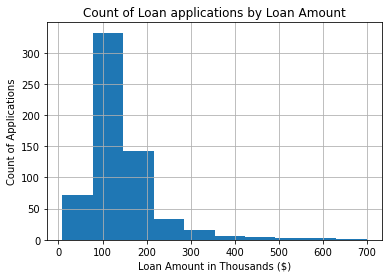

In [25]:
# Univariate visual for count of loan applications by loan amount
df_la['LoanAmount'].hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Loan Amount in Thousands ($)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Loan Amount')

Text(0.5, 1.0, 'Count of Loan applications by Gender')

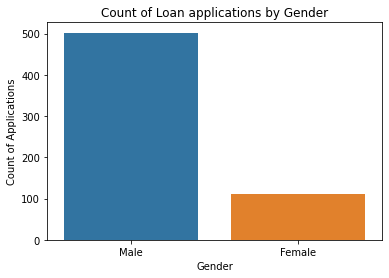

In [26]:
# Count of Men vs Women applicants
sns.countplot(data=df_la,x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Gender')

Text(0.5, 1.0, 'Count of Loan applications by Marital Status')

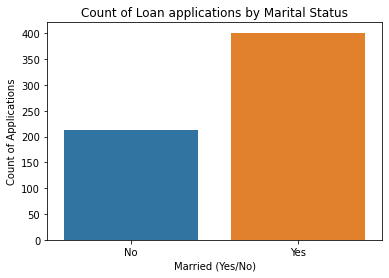

In [27]:
# Count of Men vs Women applicants
sns.countplot(data=df_la,x='Married')
plt.xlabel('Married (Yes/No)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Marital Status')

Text(0.5, 1.0, 'Count of Loan applications by Dependent Quantity')

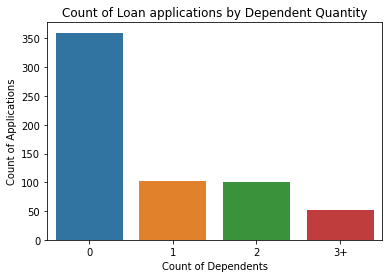

In [28]:
# Count of Loan applications by Dependent Quantity
sns.countplot(data=df_la,x='Dependents')
plt.xlabel('Count of Dependents')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Dependent Quantity')

Text(0.5, 1.0, 'Count of Loan applications by Graduate Status')

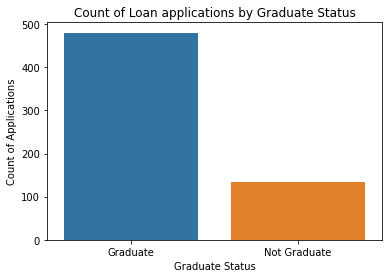

In [29]:
# Count of applications by graduate status
sns.countplot(data=df_la,x='Education')
plt.xlabel('Graduate Status')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Graduate Status')

Text(0.5, 1.0, 'Count of Loan applications by Applicant Income')

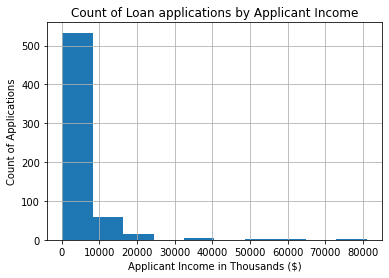

In [30]:
# Count of applications by Application Income
df_la['ApplicantIncome'].hist()
plt.xlabel('Applicant Income in Thousands ($)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Applicant Income')

Text(0.5, 1.0, 'Count of Loan applications by Applicant Income')

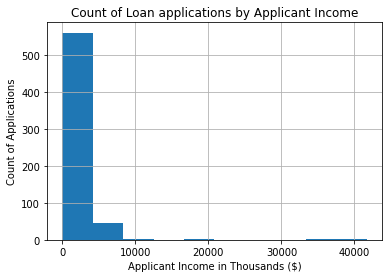

In [31]:
# Count of applications by Coapplicant Income
df_la['CoapplicantIncome'].hist()
plt.xlabel('Applicant Income in Thousands ($)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Applicant Income')

Text(0.5, 1.0, 'Count of Loan applications by Loan Amount Terms')

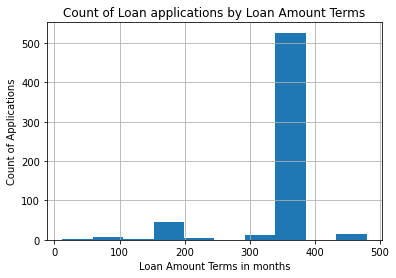

In [32]:
# Count of applications by Coapplicant Income
df_la['Loan_Amount_Term'].hist()
plt.xlabel('Loan Amount Terms in months')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Loan Amount Terms')

Text(0.5, 1.0, 'Count of Loan applications by Loan Amount Terms')

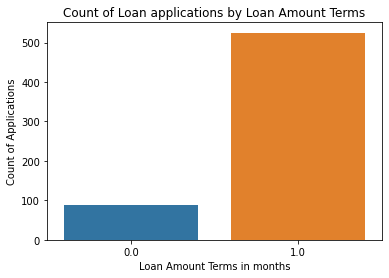

In [33]:
# Count of applications by Credit History
sns.countplot(data=df_la,x='Credit_History')
plt.xlabel('Loan Amount Terms in months')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Loan Amount Terms')

Text(0.5, 1.0, 'Count of Loan applications by Property Area')

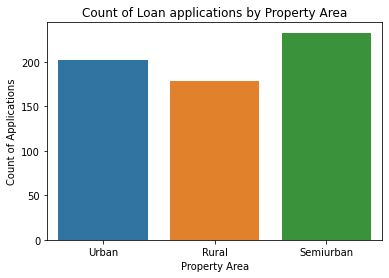

In [34]:
# Count of applications by Property Area
sns.countplot(data=df_la,x='Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Property Area')

Text(0.5, 1.0, '# of Loans approved vs denied')

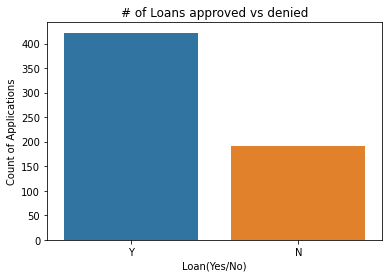

In [35]:
# Approved vs denied Loan
sns.countplot(data=df_la,x='Loan_Status')
plt.xlabel('Loan(Yes/No)')
plt.ylabel('Count of Applications')
plt.title('# of Loans approved vs denied')

## Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

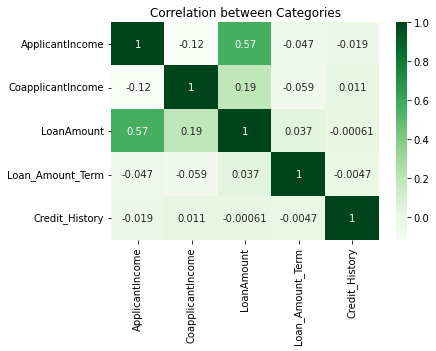

In [36]:
corr = df_la.corr()
ax = sns.heatmap(corr,cmap="Greens",annot=True)
ax.set_title("Correlation between Categories");

In [37]:
# The strongest correlation is between Loan Amount and income 
# next strongest correlation is between the Loan Amount and the co-applicant income

## Identify Outliers

In [38]:
df_la.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [39]:
# Applicant income has an outlier where a max income is $810k
# There is also an outlier in the loan amount where the max loan amount is $650k vs the mean loan amount which is $144k

## Machine Learning

### Prepare for ML

In [40]:
# reload dataframe for ML

df = pd.read_csv(loan)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
# Define Target vector and features
X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df['Loan_Status']

# Split training and testing data
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 42)

In [42]:
# Setup column selectors for both numbers and objects
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [43]:
# Create imputers for NULL values
freq_imputer = SimpleImputer(strategy='most_frequent')
med_imputer = SimpleImputer(strategy='median')

In [44]:
# Instantiate StandardScaler() and OHE
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
# Create pipeline for num and cat selectors with scaler and ohe
cat_pipe = make_pipeline(freq_imputer,ohe)
num_pipe = make_pipeline(med_imputer,scaler)

cat_pipe,num_pipe

(Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))]),
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]))

In [46]:
# Create num and cat tuple
cat_tuple = (cat_pipe,cat_selector)
num_tuple = (num_pipe,num_selector)


In [47]:
# Instantiate column transformer
transformer = make_column_transformer(cat_tuple,num_tuple,remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a67949990>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a6791ea90>)])

### Evaluate Classification Function

In [48]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC 
# Function taken from codealone notebook week 8 Day 1
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=3, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes,
                                        ax=ax[0])
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap,
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])
  
  curve = metrics.plot_roc_curve(model, X_test, y_test, ax=ax[2])
  curve.ax_.grid()
  curve.ax_.plot([0, 1], [0, 1], ls=':')

### Logistic Regression Model

In [49]:
# Instantiate a logistic regression model
logreg = LogisticRegression()

# Put model and scaler into a pipeline
logreg_pipe = make_pipeline(transformer,logreg)

In [50]:
# Fit the logistic regression pipe onto the training set
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a67949990>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a6791ea90>)])),
                ('logisticregression', LogisticRegression())])

In [51]:
# Setup predictons for test and training data
train_preds_lr = logreg_pipe.predict(X_train)
test_preds_lr = logreg_pipe.predict(X_test)

In [52]:
# Print accuracy scores for test and training data

print('Logistic Regression Training Data Score: ', accuracy_score(y_train, train_preds_lr))
print('Logistic Regression Testing Data Score: ', accuracy_score(y_test, test_preds_lr))

Logistic Regression Training Data Score:  0.8217391304347826
Logistic Regression Testing Data Score:  0.7727272727272727


              precision    recall  f1-score   support

           N       0.91      0.39      0.55        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


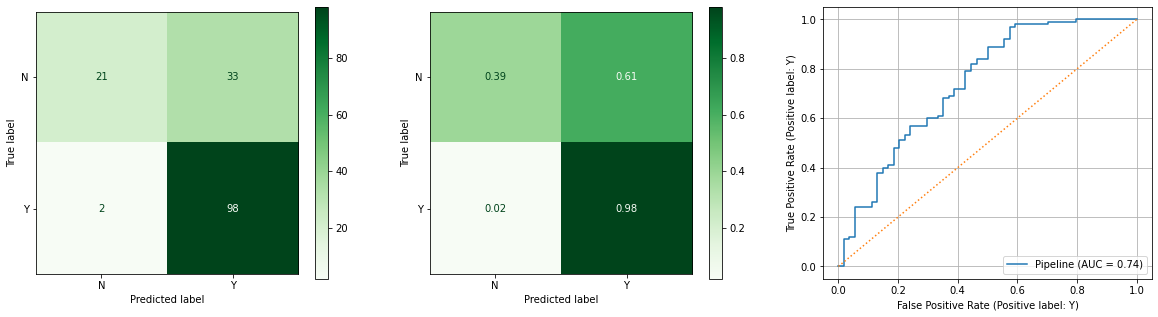

In [53]:
# Print evaluation classification report
evaluate_classification(logreg_pipe,X_test,y_test)

#### Hypertuned Logistic Regression Model

In [54]:
# look at parameters to tune
logreg_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a67949990>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                      

In [55]:
# Setup parameter dictionary for hypertuning
params = {'logisticregression__C':[0.0001, .001, .01, .1, 1, 10, 100], 
          'logisticregression__penalty':['l1', 'l2'],
          'logisticregression__class_weight':[None, 'balanced'],
          'logisticregression__solver': ['liblinear']}

In [56]:
# Setup GridSearchCV to test the parameter dictionary above to find the best fit for the model
logreg_gridcv = GridSearchCV(logreg_pipe, params)

# Fit logreg_gridcv onto training data
logreg_gridcv.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a679...
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a6791ea90>)])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100],
                         'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear']})

In [57]:
# Use best_params to find best parameters for logreg model
logreg_gridcv.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__class_weight': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [58]:
# Extract best version of the model from gridsearch cv
best_logreg = logreg_gridcv.best_estimator_

In [59]:
# Setup predictons for test and training data after hypertuning
train_preds_tuned = best_logreg.predict(X_train)
test_preds_tuned = best_logreg.predict(X_test)

In [60]:
# Print accuracy scores for test and training data
print('Logistic Regression Training Data Score: ', accuracy_score(y_train, train_preds_tuned))
print('Logistic Regression Testing Data Score: ', accuracy_score(y_test, test_preds_tuned))

Logistic Regression Training Data Score:  0.8217391304347826
Logistic Regression Testing Data Score:  0.7727272727272727


              precision    recall  f1-score   support

           N       0.91      0.39      0.55        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


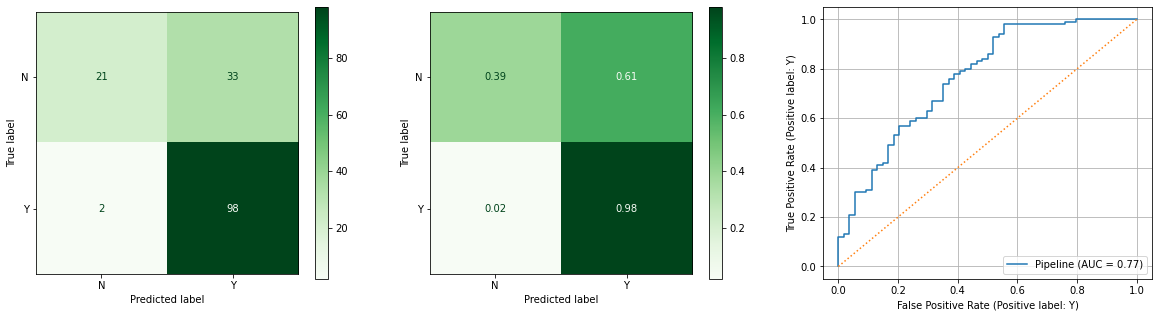

In [61]:
# Print evaluation classification report for hypertuned model
evaluate_classification(best_logreg,X_test,y_test)

### KNN Model

In [62]:
# Instantiate KNN model 
knn = KNeighborsClassifier()

# Create pipeline with transformer and knn model
knn_pipe = make_pipeline(transformer,knn)

In [63]:
# fit training data 
knn_pipe.fit(X_train,y_train)

# Setup predictions on training and test data
train_preds_knn = knn_pipe.predict(X_train)
test_preds_knn = knn_pipe.predict(X_test)

In [64]:
# print accuracy score for both training and test dataset
print('KNN train score:', accuracy_score(y_train, train_preds_knn))
print('KNN test score:', accuracy_score(y_test, test_preds_knn))

KNN train score: 0.8434782608695652
KNN test score: 0.7727272727272727


              precision    recall  f1-score   support

           N       0.85      0.43      0.57        54
           Y       0.76      0.96      0.85       100

    accuracy                           0.77       154
   macro avg       0.80      0.69      0.71       154
weighted avg       0.79      0.77      0.75       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


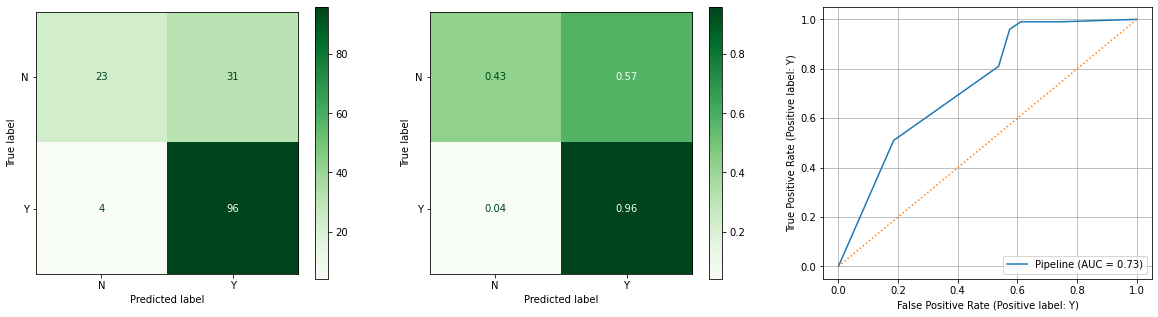

In [65]:
evaluate_classification(knn_pipe,X_test,y_test)

#### Hypertuned KNN Model

In [66]:
# Use get_params method to see which hyperparameters can be tuned
knn_pipe.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a67949990>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                      

In [67]:
# Setup dictionary for hyperparameters that will be tuned
params = {'kneighborsclassifier__n_neighbors': range(1, 20),
          'kneighborsclassifier__weights': ['uniform', 'distance'],
          'kneighborsclassifier__p': [2, 3, 4]}

In [68]:
# Setup GridSearchCV to test the parameter dictionary above to find the best fit for the model
knn_gridcv = GridSearchCV(knn_pipe, params)

# Fit logreg_gridcv onto training data
knn_gridcv.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a679...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a6791ea90>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 20),
                         'kneighborsclassifier__p': [2, 3, 4],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [69]:
# Use best_params to find best parameters for knn model
knn_gridcv.best_params_

{'kneighborsclassifier__n_neighbors': 15,
 'kneighborsclassifier__p': 4,
 'kneighborsclassifier__weights': 'uniform'}

In [70]:
# Extract best version of the knn model from gridsearch cv
best_knn = knn_gridcv.best_estimator_

In [71]:
# Setup predictons for test and training data after hypertuning
train_preds_knn_tuned = best_knn.predict(X_train)
test_preds_knn_tuned = best_knn.predict(X_test)

In [72]:
# print accuracy score for both training and test dataset
print('Hypertuned KNN train score:', accuracy_score(y_train, train_preds_knn_tuned))
print('Hypertuned KNN test score:', accuracy_score(y_test, test_preds_knn_tuned))

Hypertuned KNN train score: 0.8195652173913044
Hypertuned KNN test score: 0.7857142857142857


              precision    recall  f1-score   support

           N       0.96      0.41      0.57        54
           Y       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


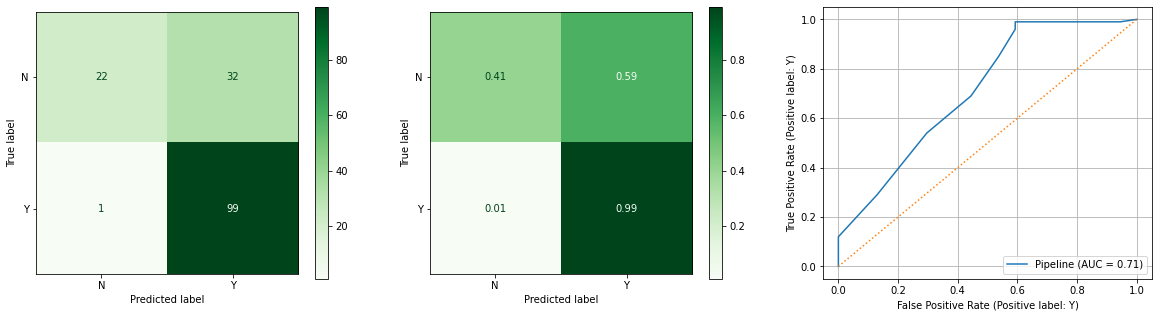

In [73]:
# Print evaluation classification report for hypertuned model
evaluate_classification(best_knn,X_test,y_test)

### Choose your "production" model and justify this decision

In [74]:
# The production model that I would choose based on the two versions of both KNN and Logistic Regression models tested would be the default KNN model. 
# I would choose this model as my final model because even though the true positives rate is slightly lower, it also had a higher percentage of
# predicting the true negatives and a lower percentage of finding false positives